<a href="https://colab.research.google.com/github/KimJisanER/Dacon/blob/main/02_23_image_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import warnings
warnings.filterwarnings(action='ignore')

os.environ["CUDA_VISIBLE_DEVICES"]="0" # GPU 할당


In [ ]:
import tensorflow as tf

In [ ]:
#create training dataset
from glob import glob
import numpy as np
import PIL
from PIL import Image

path = '/content/drive/MyDrive/Image_classi/data/train/'

training_images = []
training_labels = []

for filename in glob(path +"*"):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img) #read img
        img_array = np.array(an_img) #img to array
        training_images.append(img_array) #append array to training_images 
        label = filename.split('/')[-1] #get label
        training_labels.append(label) #append label
        
training_images = np.array(training_images)
training_labels = np.array(training_labels)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels= le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)

print(training_images.shape)
print(training_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
print(training_labels)

[[2]
 [2]
 [2]
 ...
 [5]
 [5]
 [5]]


In [ ]:
#create test dataset

path = '/content/drive/MyDrive/Image_classi/data/test/'

test_images = []
test_idx = []

flist = sorted(glob(path + '*.jpg'))

for filename in flist:
    an_img = PIL.Image.open(filename) #read img
    img_array = np.array(an_img) #img to array
    test_images.append(img_array) #append array to training_images 
    
    label = filename.split('/')[-1] #get id 
    test_idx.append(label) #append id
    
test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[0:5])

(10000, 32, 32, 3)
['0000.jpg', '0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg']


[2],[2],[9],[9],[0],[0],[3],[3],[1],[1],[8],[8],[6],[6],[4],[4],[7],[7],[5],[5],

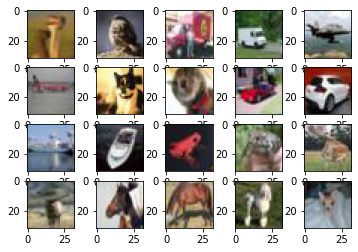

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(training_images[i*2500])
    print(training_labels[i*2500], end=",")
plt.show()

In [ ]:
label_num = [0,1,2,3,4,5,6,7,8,9]
label_name = le.inverse_transform(label_num)

for i in range(10):
  print(label_num[i], label_name[i])

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


In [ ]:
from matplotlib import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    
    rotation_range = 20,
    brightness_range = [0.9,1.0],
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)


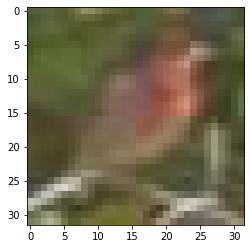

In [ ]:
sample_image = training_images[1]
plt.imshow(sample_image.astype('uint8'))
sample_image = np.expand_dims(sample_image,0)

In [ ]:
sample_image_it = image_generator.flow(sample_image, batch_size=1)

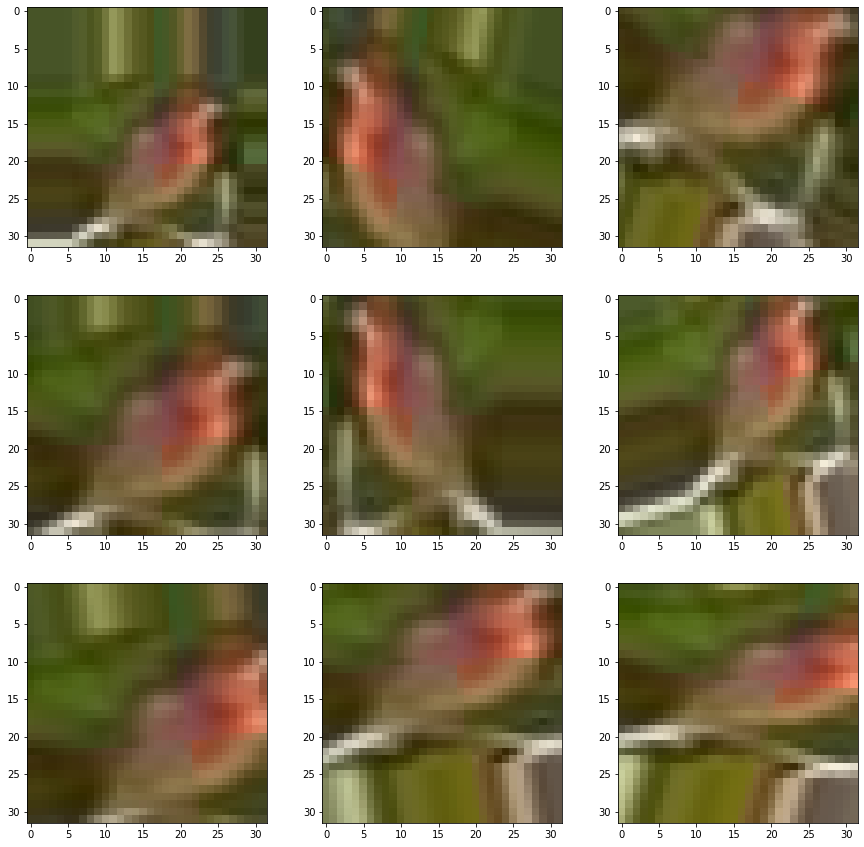

In [ ]:
fig = plt.figure(figsize = (15,15))
for i in range(9):
  plt.subplot(3,3,1+i)
  batch = sample_image_it.next()
  image = batch[0].astype('uint8')
  plt.imshow(image)
plt.show()

In [ ]:
augment_size = 250000

random_mask = np.random.randint(training_images.shape[0], size=augment_size)
training_image_aug = training_images[random_mask].copy()
training_labels_aug = training_labels[random_mask].copy()

In [ ]:
training_image_aug = image_generator.flow(training_image_aug, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

training_images = np.concatenate((training_images, training_image_aug))
training_labels = np.concatenate((training_labels, training_labels_aug))

In [ ]:
print(training_images.shape)
print(training_labels.shape)

(300000, 32, 32, 3)
(300000, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(training_images, training_labels, test_size=0.2, stratify = training_labels, random_state=1809)

X_test = test_images

In [ ]:
print('X_train 크기:',X_train.shape)
print('X_valid 크기:',X_valid.shape)
print('X_test  크기:',X_test.shape)

X_train 크기: (240000, 32, 32, 3)
X_valid 크기: (60000, 32, 32, 3)
X_test  크기: (10000, 32, 32, 3)


In [ ]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer

    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer

    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer

    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_17 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                        

In [ ]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=25, batch_size=128)

Epoch 1/25
1875/1875 [==============================] - 57s 25ms/step - loss: 1.2311 - accuracy: 0.5740 - val_loss: 1.1677 - val_accuracy: 0.6122
Epoch 2/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.7286 - accuracy: 0.7575 - val_loss: 0.6329 - val_accuracy: 0.7828
Epoch 3/25
1875/1875 [==============================] - 46s 24ms/step - loss: 0.5424 - accuracy: 0.8191 - val_loss: 0.6859 - val_accuracy: 0.7715
Epoch 4/25
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4151 - accuracy: 0.8602 - val_loss: 0.5197 - val_accuracy: 0.8232
Epoch 5/25
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3133 - accuracy: 0.8939 - val_loss: 0.5227 - val_accuracy: 0.8308
Epoch 6/25
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2399 - accuracy: 0.9186 - val_loss: 0.5005 - val_accuracy: 0.8412
Epoch 7/25
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1838 - accuracy: 0.9373 - val_loss: 0.5433 -

In [ ]:
pred_proba = model.predict(X_test) 

pred_class = []

for i in pred_proba:
    pred = np.argmax(i)
    pred_class.append(pred)
    
pred_class = le.inverse_transform(pred_class)
pred_class[0:5]

array(['horse', 'airplane', 'airplane', 'horse', 'airplane'], dtype='<U10')

In [ ]:
import pandas as pd

sample_submission = pd.read_csv("/content/drive/MyDrive/Image_classi/data/sample_submission.csv")

sample_submission.target = pred_class
sample_submission.to_csv("22_02_24_submit_1.csv",index=False)